## EXERCISE: 
**Use OOP to create a gradient descent class with Linear Regression using MSE(same as RSS only divided by total # of data points) as a Cost Function**

### Reminder: Steps to find the optimal slope and intercept of a line of best fit using RSS as our cost function 
1. Take the partial derivative of the loss function for each parameter(gradient).
2. Pick random values for the parameters. 
3. Plug the parameter values into the derivatives. 
4. Calculate the step sizes (slope * learning rate) 
5. Calculate new parameters (old parameters - step size) 
6. Repeat steps 3-5 until max number of steps is reached or minimum step size is reached. 


In [1]:
import numpy as np 

In [2]:
class GradientDescentMSE:
    #initializer
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
        
    #fit
    def fit(self, X, y):
        m = 0 
        b = 0
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - (m*X + b))/n
            m_gradient = -2 * np.sum(X*(y - (m*X + b)))/n
            b = b - (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
        
    #predict
    def predict(self, X):
        return self.m*X + self.b 
        

## Let's see if it worked!

In [3]:
#create a cloud of points normally distributed around the line y=x 
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

In [4]:
#instantiate a linear regression 
lr = GradientDescentMSE()

In [5]:
#fit gradient descent to our data
lr.fit(X, y)

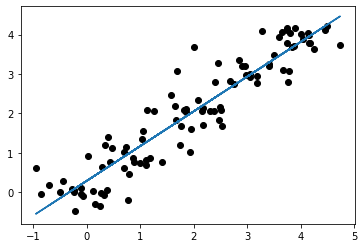

In [6]:
#create a scatter plot with a predicted line of best fit to our data 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.scatter(X, y, color='black')
plt.plot(X, lr.predict(X))

In [7]:
#What are the values of our intercept and slope?
print(lr.b)
print(lr.m)

0.28875762105975056
0.8812889601846241
